<a href="https://colab.research.google.com/github/Fasih1994/Applied-AI-Labs/blob/master/ETL_for_IBM_Data_Science_Capstone_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir ~/.kaggle/

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fasih1994","key":"484bedc0e67bc82011e7c682a6ae3430"}'}

In [0]:
!git clone https://github.com/Fasih1994/IBM_data_science_capstone.git

Cloning into 'IBM_data_science_capstone'...


In [0]:
!cp kaggle.json IBM_data_science_capstone/

In [0]:
!cd IBM_data_science_capstone/

In [0]:
import os 
os.chdir("IBM_data_science_capstone/")

In [0]:
!git add kaggle.json

In [0]:
!git commit -m "added kaggle.json"

[master (root-commit) 1864a03] added kaggle.json
 1 file changed, 1 insertion(+)
 create mode 100644 kaggle.json


In [0]:
!git push 

fatal: could not read Username for 'https://github.com': No such device or address


In [0]:
!cp kaggle.json /root/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets list -s Sign 

ref                                                        title                                               size  lastUpdated          downloadCount  
---------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
datamunge/sign-language-mnist                              Sign Language MNIST                                 31MB  2017-10-20 15:09:18           6569  
ardamavi/sign-language-digits-dataset                      Sign Language Digits Dataset                         8MB  2017-12-24 16:08:56           5961  
grassknoted/asl-alphabet                                   ASL Alphabet                                         1GB  2018-04-22 19:31:36           3742  
divyanshrai/handwritten-signatures                         handwritten signatures                             185MB  2018-11-08 05:27:21            440  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign             GTSRB - German Tr

In [0]:
!kaggle datasets download grassknoted/asl-alphabet 

 99% 1.00G/1.01G [00:22<00:00, 36.3MB/s]
100% 1.01G/1.01G [00:22<00:00, 47.4MB/s]


In [0]:
!unzip asl-alphabet.zip

Archive:  asl-alphabet.zip
  inflating: asl_alphabet_train.zip  
  inflating: asl_alphabet_test.zip   


In [0]:
!unzip asl_alphabet_train.zip
!unzip asl_alphabet_test.zip

Archive:  asl_alphabet_train.zip
   creating: asl_alphabet_train/
   creating: asl_alphabet_train/space/
  inflating: asl_alphabet_train/space/space130.jpg  
  inflating: asl_alphabet_train/space/space13.jpg  
  inflating: asl_alphabet_train/space/space1298.jpg  
  inflating: asl_alphabet_train/space/space1297.jpg  
  inflating: asl_alphabet_train/space/space1296.jpg  
  inflating: asl_alphabet_train/space/space1294.jpg  
  inflating: asl_alphabet_train/space/space1293.jpg  
  inflating: asl_alphabet_train/space/space129.jpg  
  inflating: asl_alphabet_train/space/space1286.jpg  
  inflating: asl_alphabet_train/space/space1285.jpg  
  inflating: asl_alphabet_train/space/space1283.jpg  
  inflating: asl_alphabet_train/space/space1282.jpg  
  inflating: asl_alphabet_train/space/space1281.jpg  
  inflating: asl_alphabet_train/space/space1277.jpg  
  inflating: asl_alphabet_train/space/space1275.jpg  
  inflating: asl_alphabet_train/space/space1274.jpg  
  inflating: asl_alphabet_train/spa

In [0]:
import os 
#filename = 'fingerspelling5.tar.bz2'
# Uncompress
#os.system('tar xjf {}'.format(filename))

In [0]:
!rm -r *.zip

In [0]:
train_dir = 'asl_alphabet_train/'
test_dir = 'asl_alphabet_test/'

In [0]:
img_dict = {'filename':[],'width':[],'hight':[]}
for category in os.listdir(train_dir):
  path = os.path.join(train_dir,category)
  for file in os.listdir(path):
    img_path = os.path.join(path,file)
    img = Image.open(img_path)
    width,hight = img.size
    img_dict['filename'].append(file)
    img_dict['width'].append(width)
    img_dict['hight'].append(hight)
    

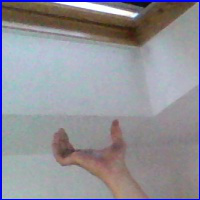

In [0]:
Image.open(img_path)

In [0]:
img_df.describe()

width    hight
count  87000.0  87000.0
mean     200.0    200.0
std        0.0      0.0
min      200.0    200.0
25%      200.0    200.0
50%      200.0    200.0
75%      200.0    200.0
max      200.0    200.0

In [0]:
!git clone https://github.com/MrGeislinger/ASLTransalation.git

Cloning into 'ASLTransalation'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 132380 (delta 4), reused 9 (delta 2), pack-reused 132369
Receiving objects: 100% (132380/132380), 2.71 GiB | 51.83 MiB/s, done.
Resolving deltas: 100% (363/363), done.
Checking out files: 100% (65840/65840), done.


In [0]:
len(os.listdir('dataset5/A/a/'))

1055

In [0]:
import os
import re
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image 
from functools import reduce

## Variables needed for reference throughout sections
dataset_url = 'www.cvssp.org/FingerSpellingKinect2011/fingerspelling5.tar.bz2'
filename = 'fingerspelling5.tar.bz2'
# Data directory
final_data_dir = 'data'
# Data's top-level directory (after download & decompreshion)
dataset_dir = 'dataset5'
# Filename for image sizes
img_sizes_csv = 'image_sizes.csv'

In [0]:
# Make a new data directory if doesn't exist
if not os.path.exists(final_data_dir):
    os.makedirs(final_data_dir)

# Define patterns for depth files & RGB files 
# Format: `depth_0_0528.png` & `color_12_0137.png`
pattern_depth_file = '(depth\w*.png)'
pattern_rgb_file = 'color_\d*_(\d*).png'
# Number of files renamed/delted
n_del, n_rename = 0,0

# Save that this is a new subject (numerical since letter can be confusing)
# Each subject in directory with a letter ('A','B','C',...)
for (subject_id, subject_dir) in enumerate(os.listdir(dataset_dir)):
    # Directories for each letter (excluding "j" & "z")
    path_to_subject = os.path.join(dataset_dir, subject_dir)
    
    for letter_dir in os.listdir(path_to_subject):
        # Use letter as number ('a' starts @ 00)
        letter_id = ord(letter_dir.lower()) - ord(('a'))
        letter_id = '0{}'.format(letter_id) if letter_id < 10 else letter_id
        path_to_letter = os.path.join(path_to_subject, letter_dir)
        
        for image_file in os.listdir(path_to_letter):
            # Remove depth file
            if re.search(pattern_depth_file, image_file):
                path_depth_file = os.path.join(path_to_letter, image_file)
                os.remove(path_depth_file)
                # Inform depth file removed
                print('\r#{}: Depth file deleted {}'.format(n_del,path_depth_file), end='')
                n_del += 1
            else:
                # Get ID of each file (None if not matched)
                num_id = re.match(pattern_rgb_file, image_file)
                if num_id:
                    # Get the matching parathesis only
                    num_id = num_id.group(1)
                    path_image_file = os.path.join(path_to_letter, image_file)
                    # Rename image
                    new_image_name = '{}_{}_{}.png'.format(letter_id,subject_id,num_id)
                    new_path_image_file = os.path.join(final_data_dir, new_image_name)
                    os.rename(path_image_file, new_path_image_file)
                    # Inform image renamed
                    print('\r#{}: {} renamed from {}'.format(n_rename,new_path_image_file,path_image_file), end='')
                    n_rename += 1
            sys.stdout.flush()

In [0]:
file_name = os.listdir('data/')[54]
img_path = os.path.join(final_data_dir,file_name)
#img_path
img = Image.open(img_path)
width , hight = img.size
print(width,hight)

153 111


In [0]:
file_names = os.listdir('')
img_dict = {'filename':[],'width':[],'hight':[]}
for img_file in file_names:
  img_path = os.path.join(final_data_dir,img_file)
  img = Image.open(img_path)
  width,hight = img.size
  img_dict['filename'].append(img_file)
  img_dict['width'].append(width)
  img_dict['hight'].append(hight)
  
#converting Dict to dataframe
img_df = pd.DataFrame(data=img_dict)
img_df.to_csv(img_sizes_csv,index=False)

In [0]:
img_df.head()

filename  width  hight
0  23_3_0057.png     81    182
1  20_4_0518.png     69    158
2  04_0_0254.png     88    133
3  22_1_0327.png     99    126
4  04_3_0243.png     94    176

In [0]:
img_df = pd.read_csv('image_sizes.csv',index_col=False)
img_df['aspect_ratio'] = img_df['width']/img_df['hight']
img_df.head()

filename  width  hight  aspect_ratio
0  23_3_0057.png     81    182      0.445055
1  20_4_0518.png     69    158      0.436709
2  04_0_0254.png     88    133      0.661654
3  22_1_0327.png     99    126      0.785714
4  04_3_0243.png     94    176      0.534091

Text(0, 0.5, 'Number of images')

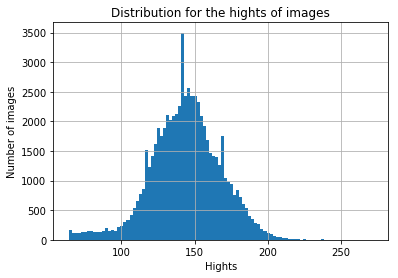

In [0]:
ax = img_df['hight'].hist(bins=100)
ax.set_title("Distribution for the hights of images")
ax.set_xlabel('Hights')
ax.set_ylabel('Number of images')

Text(0, 0.5, 'Number of images')

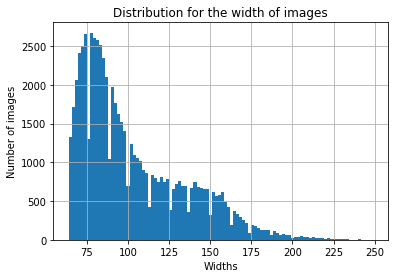

In [0]:
ax = img_df['width'].hist(bins=100)
ax.set_title("Distribution for the width of images")
ax.set_xlabel('Widths')
ax.set_ylabel('Number of images')

Text(0, 0.5, 'Number of images')

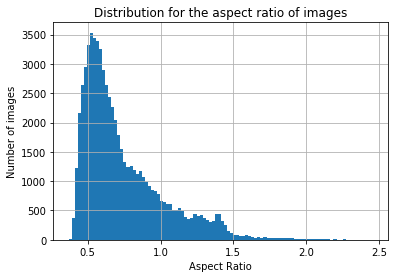

In [0]:
ax = img_df['aspect_ratio'].hist(bins=100)
ax.set_title("Distribution for the aspect ratio of images")
ax.set_xlabel('Aspect Ratio')
ax.set_ylabel('Number of images')

In [0]:
img_df.describe()

width         hight  aspect_ratio
count  65774.00000  65774.000000  65774.000000
mean     103.16952    143.769103      0.741979
std       31.83872     23.951306      0.282801
min       64.00000     64.000000      0.368421
25%       78.00000    129.000000      0.537313
50%       93.00000    144.000000      0.649007
75%      123.00000    159.000000      0.872549
max      249.00000    272.000000      2.460526

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f369815bbe0>,
      dtype=object)

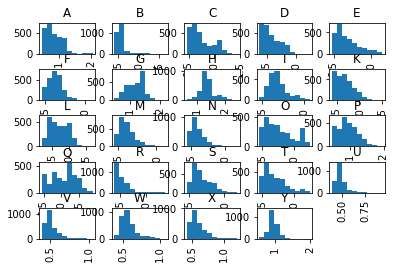

In [0]:

# Get the handshape from file name (convert number to letter)
img_df['handshape'] = img_df.apply(lambda row: chr(int(row.filename[:2])+65), axis=1)
# Plot the histograms by handshape
img_df['aspect_ratio'].hist(by=img_df['handshape'])

In [0]:
# Convert image to new size and save file
def img_resize(width, height, img_file, new_name=None):
    img_path = os.path.join(final_data_dir, img_file)
    img = Image.open(img_path)
    img = img.resize((width, height))
    #
    if new_name != None:
        img_path = os.path.join(final_data_dir, new_name)
    img.save(img_path)
    

# Resize height and width (pixels) (160,160) --> (224,224) for ResNet50
new_width, new_height  = 224, 224

# Keep track coverts
n = 1
file_list = [x for x in os.listdir(final_data_dir) if re.search('\w*png', x)]
n_imgs = len(file_list)
errors_resize = []
errors = 0

# Resize all images
for img_filename in file_list:
    # Keep track of files that were not successfully resized
    try:
        # Open up the image file and resize
        img_resize(new_width, new_height, img_filename)
    except:
        errors_resize.append((n,img_filename))
        errors += 1
    # Message out    
    print('\r#{} of {}: Resizing image `{}` w/ {} errors'.format(n,n_imgs,img_filename,errors), end='')   
    n += 1
    sys.stdout.flush()


In [0]:
from keras.preprocessing import image
im = image.load_img('ASLTransalation/fingerspelling/data/test/12/12_4_0462.png')

In [0]:
im = image.img_to_array(im)
im.shape

(160, 160, 3)

In [0]:
from sklearn.datasets import load_files
from keras.utils import np_utils
data_dir = 'data'
def load_dataset(path, n_categories=24):
    data = load_files(path)
    image_files = np.array(data['filenames'])
    # Hot encode categories to matrix
    image_targets = np_utils.to_categorical(np.array(data['target']), n_categories)
    return image_files, image_targets

def move_data_by_category(container_dir, regex_file_format='.*png'):
    '''Move data into a directory based on category'''
    # Still check if files are images
    file_list = [x for x in os.listdir(container_dir) if re.search(regex_file_format, x)]
    # Get numerical string (note that 1 digits are represented w/ 2 digits) 
    letters = {x.split('_')[0] for x in file_list}
    
    for letter in letters:
        # Only images that match letter
        images_with_letter = [filename for filename in file_list if filename.split('_')[0] == letter]
        # Add images to sub directory
        new_categ_path = os.path.join(container_dir, letter)
        if not os.path.exists(new_categ_path):
            os.makedirs(new_categ_path)
#         print('Created {new_categ_path} dir with {len(images_with_letter)} items')
        for img_filename in images_with_letter:
            path = os.path.join(container_dir, img_filename)
            new_path = os.path.join(new_categ_path, img_filename)            
            os.rename(path, new_path)
    # TODO: Check if any files were skipped (improperly named?)
        

def get_testing_data(data_dir, subject_num='4'):
    '''Get all data/images pertaining to one subject'''
    # Only search in directory for images with that subject
    file_list = [x for x in os.listdir(data_dir) if re.search('\d+_{}_\d*\.png'.format(subject_num), x)]
    
    # Make a new testing data directory if doesn't exist
    testing_dir = os.path.join(data_dir, 'test')
    if not os.path.exists(testing_dir):
        os.makedirs(testing_dir)
        
    # Move images of particular subject into testing directory
    for image_filename in file_list:
        # file is **_n_****.png where n is an integer representing a subject
        _, subject, _ = image_filename.split('_')
        # Move file into testing directory
        path = os.path.join(data_dir, image_filename)
        new_path = os.path.join(testing_dir, image_filename)
        os.rename(path, new_path)
        
    # Move each image file's numerical str representing letters found in testing into own category directory
    move_data_by_category(testing_dir)
    
    return load_dataset(testing_dir)


def get_training_validation_data(data_dir, ratio=0.8):
    '''Randomly split data into training and validation sets'''
    # Only search in directory for images
    file_list = [x for x in os.listdir(data_dir) if re.search('.*png', x)]
    
    # Make a new training & validation data directory if doesn't exist
    train_dir = os.path.join(data_dir, 'train')
    valid_dir = os.path.join(data_dir, 'valid')
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(valid_dir):
        os.makedirs(valid_dir)
        
    # Randomly split file list into training and vaidation sets
    np.random.shuffle(file_list)
    split_int = int(ratio * len(file_list))
    train_list = file_list[:split_int]
    valid_list = file_list[split_int:]
    
    # Move images of particular subject into testing directory
    for filenames, new_dir in [(train_list, train_dir), (valid_list, valid_dir)]:
        for image_filename in filenames:
            # Move file into testing directory
            path = os.path.join(data_dir, image_filename)
            new_path = os.path.join(new_dir, image_filename)
            os.rename(path, new_path)

        # Move each image file's numerical str representing letters found in testing into own category directory
        move_data_by_category(new_dir)
    
    return (load_dataset(train_dir), load_dataset(valid_dir))

Using TensorFlow backend.


In [0]:

# Manually set if the data is RGB
is_rgb = True

test_data, test_targets = get_testing_data(data_dir)
train, valid = get_training_validation_data(data_dir)
# Separated data and its targets
train_data, train_targets = train
valid_data, valid_targets = valid

KeyboardInterrupt: ignored

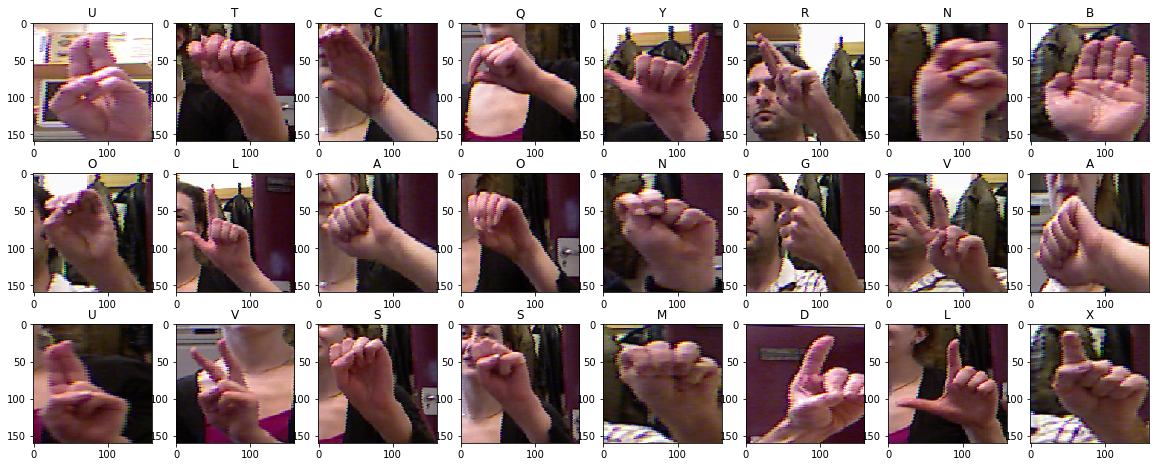

In [0]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFile  
from sklearn.datasets import load_files
from keras.utils import np_utils
from keras.preprocessing import image                  
from tqdm import tqdm

np.random.seed(8675301)
%matplotlib inline

# Display image previews below
plt.figure(figsize=(20,55))
columns = 8
n = 1

# Randomly choose images to display (with label)
for image_path in np.random.choice(train_data, 24, replace=False):
    img = Image.open(image_path)
    plt.subplot(20, columns, n)
    n+=1
    plt.imshow(img)
    letter = image_path.split('/')[-1][:2]
    letter = chr(int(letter)+65)
    plt.title(letter)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        'data/train',
        # All images will be resized to 150x150
        target_size=(160, 160),
        batch_size=1164,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'data/valid',
        target_size=(160, 160),
        batch_size=349,
        class_mode='categorical')

Found 41904 images belonging to 24 classes.
Found 10477 images belonging to 24 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (1164, 160, 160, 3)
labels batch shape: (1164, 24)


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()
#Convo 224, 224, 1
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(160, 160, 3)))
#
model.add(MaxPooling2D(pool_size=2))
#
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
#
model.add(MaxPooling2D(pool_size=2))
#
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
#
model.add(MaxPooling2D(pool_size=2))
#
model.add(GlobalAveragePooling2D())
#Dense; 24 for each handshape 
model.add(Dense(24, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 160, 160, 16)      208       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 80, 80, 32)        2080      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 40, 40, 64)        8256      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 64)                0         
__________

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint  
models_dir = 'saved_models'
epochs = 16

# Create a saved models directory
if not os.path.exists(models_dir):
    os.makedirs(models_dir)


model.fit_generator(
      train_generator,
      steps_per_epoch=36,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=30)

Epoch 1/20
36/36 [==============================] - 91s 3s/step - loss: 3.0761 - acc: 0.0928 - val_loss: 3.0765 - val_acc: 0.0869
Epoch 2/20
36/36 [==============================] - 81s 2s/step - loss: 3.0623 - acc: 0.1006 - val_loss: 3.0787 - val_acc: 0.0843
Epoch 3/20
36/36 [==============================] - 79s 2s/step - loss: 3.0502 - acc: 0.1089 - val_loss: 3.0480 - val_acc: 0.1056
Epoch 4/20
36/36 [==============================] - 80s 2s/step - loss: 3.0353 - acc: 0.1142 - val_loss: 3.0136 - val_acc: 0.1343
Epoch 5/20
36/36 [==============================] - 80s 2s/step - loss: 3.0194 - acc: 0.1207 - val_loss: 3.0221 - val_acc: 0.1112
Epoch 6/20
36/36 [==============================] - 79s 2s/step - loss: 3.0049 - acc: 0.1234 - val_loss: 2.9940 - val_acc: 0.1207
Epoch 7/20
36/36 [==============================] - 79s 2s/step - loss: 2.9841 - acc: 0.1251 - val_loss: 2.9840 - val_acc: 0.1180
Epoch 8/20
36/36 [==============================] - 80s 2s/step - loss: 2.9624 - acc: 0.13

In [0]:
test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(160, 160),
        batch_size=349,
        class_mode='categorical')

model.evaluate_generator(test_generator,steps =30)

Found 13393 images belonging to 24 classes.


[2.9277496496836344, 0.16590257858236632]

In [0]:
!git init

Initialized empty Git repository in /content/.git/


In [0]:
!git config --global user.name "Fasih1994"

In [0]:
!git config --global user.email "fasihuddin1994@gmail.com"

In [0]:
!git add 'kaggle.json'

In [0]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   kaggle.json

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.config/
	ASLTransalation/
	Base_CNN_s877_e16
	asl-rgb-depth-fingerspelling-spelling-it-out.zip
	dataset5/
	fingerspelling5.tar.bz2
	sample_data/



In [0]:
!git remote add origin https://github.com/Fasih1994/IBM_data_science_capstone.git

In [0]:
!git commit -m 'some'

[master (root-commit) ff92bf2] some
 1 file changed, 1 insertion(+)
 create mode 100644 kaggle.json


In [0]:
!git push --set-upstream origin master

fatal: could not read Username for 'https://github.com': No such device or address


In [0]:
!ssh-keygen -t rsa


Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
/root/.ssh/id_rsa already exists.
Overwrite (y/n)? y
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:nhGUq2w3B5eK2erIL/v/l19ek5gzkZE6Ol6RgHzi3iY root@3d491c9bda47
The key's randomart image is:
+---[RSA 2048]----+
|        ..       |
|      ..o     .  |
|       +.+ . o   |
|      . =.+ o o  |
|     . *S+ = o   |
|      B.*oo o + .|
|     . EoB . * oo|
|   .... + o o ooo|
|    +*+..o.. .. .|
+----[SHA256]-----+


In [0]:
!mkdir ~/.ssh

mkdir: cannot create directory ‘/root/.ssh’: File exists


In [0]:
!cp id_rsa ~/.ssh/

In [0]:
! chmod 600 /root/.ssh/id_rsa
! ssh-keyscan github.com >> /root/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-80573d3e
# github.com:22 SSH-2.0-babeld-80573d3e
# github.com:22 SSH-2.0-babeld-80573d3e


In [0]:
!git config --global user.email "fasihuddin1994@gmail.com"

In [0]:
!git config --global user.name "Fasih1994"

In [0]:
key = \
'''
SHA256:GPhIS4CRXNp3/LsZMWZf9sulUu5NzAWw2PBoOvsRfCo
'''
! mkdir -p /root/.ssh
with open(r'/root/.ssh/id_rsa', 'w', encoding='utf8') as fh:
    fh.write(key)
! chmod 600 /root/.ssh/id_rsa
! ssh-keyscan github.com >> /root/.ssh/known_hosts 

# github.com:22 SSH-2.0-babeld-80573d3e
# github.com:22 SSH-2.0-babeld-80573d3e
# github.com:22 SSH-2.0-babeld-80573d3e


In [0]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address


In [0]:
uploaded = files.upload()

Saving id_rsa to id_rsa (1)
Saving id_rsa.pub to id_rsa (1).pub


In [0]:
! rm -rf /root/.ssh

In [0]:
! mkdir /root/.ssh

In [0]:
!mkdir .ssh


mv: target '/.ssh' is not a directory


In [0]:
!mv * .ssh/

In [0]:
! cp .ssh/* /root/.ssh

In [0]:
! chmod 700 /root/.ssh


In [0]:
! ssh-keyscan gitlab.com >> /root/.ssh/known_hosts

# gitlab.com:22 SSH-2.0-OpenSSH_7.2p2 Ubuntu-4ubuntu2.8
# gitlab.com:22 SSH-2.0-OpenSSH_7.2p2 Ubuntu-4ubuntu2.8
# gitlab.com:22 SSH-2.0-OpenSSH_7.2p2 Ubuntu-4ubuntu2.8


In [0]:
! chmod 644 /root/.ssh/known_hosts

In [0]:
! ssh git@gitlab.com

git@gitlab.com: Permission denied (publickey).
